# Clustering Crypto

In [1]:
# installing altair in order plot nice graphs in the Sagemaker
!pip install -U altair

    100% |████████████████████████████████| 737kB 24.6MB/s ta 0:00:01
Requirement not upgraded as not directly required: numpy in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (1.14.3)
Requirement not upgraded as not directly required: entrypoints in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.2.3)
Requirement not upgraded as not directly required: toolz in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.9.0)
Requirement not upgraded as not directly required: jsonschema in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (2.6.0)
Requirement not upgraded as not directly required: pandas>=0.18 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (0.24.2)
Requirement not upgraded as not directly required: jinja2 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from altair) (2.10)
Requirement not upgrad

In [23]:
# Initial imports
import pandas as pd
import altair as alt
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Data Preprocessing

In [4]:
# Loade the cryptocurrencies data
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [5]:
# Keep only cryptocurrencies that are on trading
indexNames = crypto_df[ crypto_df['IsTrading'] == False ].index
crypto_df.drop(indexNames , inplace=True)
crypto_df.sample(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
SPEC,SpecCoin,Scrypt,True,PoW,NaN,3000000000
XRA,Ratecoin,X11,True,PoW/PoS,1.345549e+08,75000000
NBL,Nybble,Scrypt,True,PoW,NaN,210000000
RUBIT,Rublebit,Scrypt,True,PoW,NaN,100000000
DBIC,DubaiCoin,SHA-256,True,PoW/PoS,5.129014e+06,10500000
EDDIE,Eddie coin,Scrypt,True,PoW/PoS,NaN,1000000000
LTB,Litebar,Scrypt,True,PoW,1.104344e+06,1350000
BSC,BowsCoin,X11,True,PoW,1.586384e+07,21000000
STALIN,StalinCoin,X11,True,PoW/PoS,NaN,3000000000
XCI,Cannabis Industry Coin,CryptoNight,True,PoW,9.781450e+05,21000000


In [6]:
# Keep only cryptocurrencies with a working algorithm
crypto_df.Algorithm.unique()

array(['Scrypt', 'X11', 'SHA-256', 'X13', 'Ethash', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'NIST5', 'Quark',
       'Groestl', 'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Blake', 'Momentum', 'Stanford Folding', 'QuBit',
       'XG Hash', 'M7 POW', 'Curve25519', 'Lyra2RE', 'QUAIT', 'vDPOS',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'Dagger',
       'CryptoNight-Lite', 'X11GOST', 'SHA-256D', 'POS 3.0',
       'Progressive-n', 'DPoS', 'Lyra2Z', 'X14', 'Time Travel', 'Argon2',
       'Keccak', 'Blake2S', 'Dagger-Hashimoto', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'YescryptR16', 'IMesh',
       'Green Protocol', 'Semux BFT consensus', 'X16R', 'Tribus',


All cryptocurrencies have an algorithm name attached to it.

In [7]:
# Remove the "IsTrading" column
crypto_df.drop(['IsTrading'], axis = 1 , inplace = True)
crypto_df.tail(5)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [8]:
# Remove rows with at least 1 null value
crypto_df = crypto_df.dropna()
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [9]:
# Remove rows with cryptocurrencies without coins mined
indexNames2 = crypto_df[ crypto_df['TotalCoinsMined'] == 0 ].index
crypto_df.drop(indexNames2 , inplace=True)
crypto_df.sample(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
WEBC,Webchain,CryptoNight-V7,PoW,1.558020e+07,1750000000
FAIR,FairCoin,Groestl,PoW/PoS,5.319383e+07,0
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000
DCR,Decred,BLAKE256,PoW/PoS,1.036505e+07,21000000
IOP,Internet of People,SHA-256,PoW/PoS,2.526078e+06,21000000
ZER,Zero,Equihash,PoW,6.921654e+06,17000000
TAU,Lamden Tau,DPoS,DPoS,2.880906e+08,500000000
CARE,Carebit,Quark,PoW/PoS,1.397396e+08,200000000
KRB,Karbo,CryptoNight,PoW,7.822433e+06,10000000
POT,PotCoin,Scrypt,PoW/PoS,2.226772e+08,420000000


In [10]:
# Fetch the cryptocurrencies names prior to drop them from crypto_df
crypto_name = crypto_df["CoinName"]
crypto_name

42                 42 Coin
404                404Coin
1337             EliteCoin
BTC                Bitcoin
ETH               Ethereum
LTC               Litecoin
DASH                  Dash
XMR                 Monero
ETC       Ethereum Classic
ZEC                  ZCash
BTS              Bitshares
DGB               DigiByte
BTCD           BitcoinDark
XPY                PayCoin
PRC            ProsperCoin
KOBO              KoboCoin
SPR             Spreadcoin
ARG               Argentum
AUR            Aurora Coin
BLU               BlueCoin
XMY             MyriadCoin
MOON              MoonCoin
ZET               ZetaCoin
SXC                SexCoin
QTL                Quatloo
ENRG            EnergyCoin
QRK              QuarkCoin
RIC                Riecoin
DGC           Digitalcoin 
BTB                 BitBar
                ...       
MI              XiaoMiCoin
GRS            Groestlcoin
CPC              CapriCoin
CLUB              ClubCoin
RADS                Radium
BTA                   Bata
P

In [11]:
# Remove the cryptocurrency name since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.drop(columns="CoinName")
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
crypto_clean = crypto_df

In [13]:
# List the unique values in the two columns with text
crypto_df.Algorithm.unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'SHA3-256', 'Equihash+

In [14]:
crypto_df.ProofType.unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'DPoC', 'LPoS', 'PoS/LPoS'], dtype=object)

In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
crypto_df["Algorithm"] = lb_make.fit_transform(crypto_df["Algorithm"])
crypto_df["ProofType"] = lb_make.fit_transform(crypto_df["ProofType"])
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,53,16,4.199995e+01,42
404,53,16,1.055185e+09,532000000
1337,67,16,2.927942e+10,314159265359
BTC,47,13,1.792718e+07,21000000
ETH,20,13,1.076842e+08,0


In [16]:
# column 'TotalCoinSupply' elements are str.
# we need to convert into numeric
crypto_df[["TotalCoinSupply"]] = crypto_df[["TotalCoinSupply"]].apply(pd.to_numeric)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,53,16,4.199995e+01,4.200000e+01
404,53,16,1.055185e+09,5.320000e+08
1337,67,16,2.927942e+10,3.141593e+11
BTC,47,13,1.792718e+07,2.100000e+07
ETH,20,13,1.076842e+08,0.000000e+00


In [17]:
# Standardize data
crypto_scaled = StandardScaler().fit_transform(crypto_df)
print(crypto_scaled[0:5])


[[ 0.39335561  0.8871567  -0.11674788 -0.15286468]
 [ 0.39335561  0.8871567  -0.09358885 -0.14499604]
 [ 1.21439604  0.8871567   0.52587231  4.4937636 ]
 [ 0.04148114  0.00878917 -0.11635442 -0.15255408]
 [-1.54195398  0.00878917 -0.11438445 -0.15286468]]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



### Reducing Dimensions Using PCA

In [18]:
# Use PCA to reduce dimension to 3 principal components
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(crypto_scaled)

In [19]:
# Create a DataFrame with the principal components data
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.412665,0.823150,0.357227
1,-0.391306,0.827873,0.358336
2,3.143152,2.186748,0.487273
3,-0.190301,-0.003829,-0.043688
4,-0.051013,-1.161387,1.020473


In [20]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.43456239, 0.28670335, 0.20580514])

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [31]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
#df_elbow.hvplot.line(x="k", y="inertia", xticks=k, label="Elbow Curve")
alt.Chart(df_elbow).mark_line().encode(
    x='k',
    y='inertia'
)


alt.Chart(...)

Running K-Means with `k=4`

In [36]:
# Initialize the K-Means model
model = KMeans(n_clusters=4,random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
df_crypto_pca["class"] = model.labels_
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,-0.412665,0.823150,0.357227,1
1,-0.391306,0.827873,0.358336,1
2,3.143152,2.186748,0.487273,1
3,-0.190301,-0.003829,-0.043688,1
4,-0.051013,-1.161387,1.020473,0


### Visualizing Results

#### 3D-Scatter with Clusters

#### We will use altair 2D

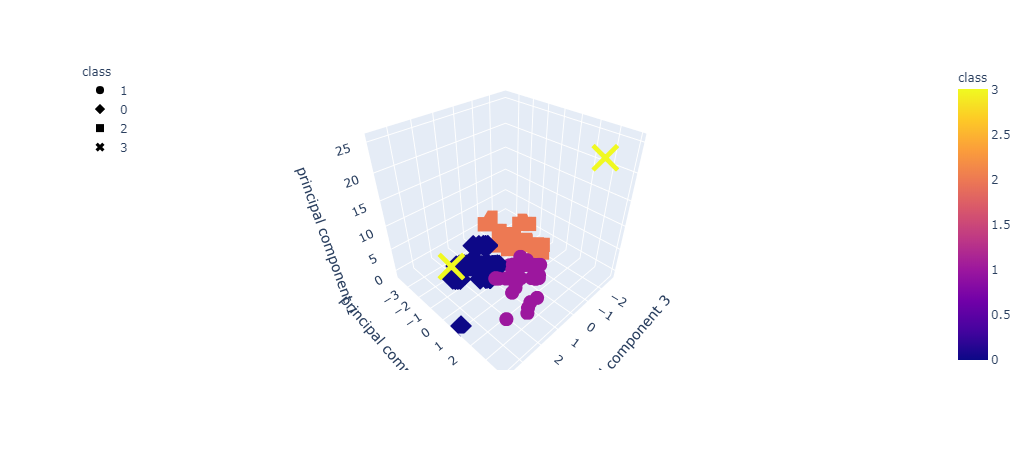

In [45]:
# Create a 2D-Scatter with the PCA data and the clusters
alt.Chart(df_crypto_pca).mark_circle(size=60).encode(
    x='principal component 1',
    y='principal component 2',
    color='Origin',
    #tooltip=["CoinName", "Algorithm", "TotalCoinsMined", "TotalCoinSupply"]
).interactive()

#### Table of Tradable Cryptocurrencies

In [46]:
# Table with tradable cryptos
crypto_name

42                 42 Coin
404                404Coin
1337             EliteCoin
BTC                Bitcoin
ETH               Ethereum
LTC               Litecoin
DASH                  Dash
XMR                 Monero
ETC       Ethereum Classic
ZEC                  ZCash
BTS              Bitshares
DGB               DigiByte
BTCD           BitcoinDark
XPY                PayCoin
PRC            ProsperCoin
KOBO              KoboCoin
SPR             Spreadcoin
ARG               Argentum
AUR            Aurora Coin
BLU               BlueCoin
XMY             MyriadCoin
MOON              MoonCoin
ZET               ZetaCoin
SXC                SexCoin
QTL                Quatloo
ENRG            EnergyCoin
QRK              QuarkCoin
RIC                Riecoin
DGC           Digitalcoin 
BTB                 BitBar
                ...       
MI              XiaoMiCoin
GRS            Groestlcoin
CPC              CapriCoin
CLUB              ClubCoin
RADS                Radium
BTA                   Bata
P

In [47]:
# Print the total number of tradable cryptocurrencies
print(f'The total number of tradable cryptocurrencies is {crypto_name.count()}')

The total number of tradable cryptocurrencies is 533


#### Scatter Plot with Tradable Cryptocurrencies

In [48]:
# Scale data to create the scatter plot
crypto_name = pd.DataFrame(crypto_name)
crypto_all = pd.concat([crypto_df,crypto_name], axis = 1)
crypto_all.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,CoinName
42,53,16,4.199995e+01,4.200000e+01,42 Coin
404,53,16,1.055185e+09,5.320000e+08,404Coin
1337,67,16,2.927942e+10,3.141593e+11,EliteCoin
BTC,47,13,1.792718e+07,2.100000e+07,Bitcoin
ETH,20,13,1.076842e+08,0.000000e+00,Ethereum


In [49]:
crypto_all.mean()

Algorithm          4.629268e+01
ProofType          1.296998e+01
TotalCoinsMined    5.319333e+09
TotalCoinSupply    1.033521e+10
dtype: float64

In [50]:
# It is convinient to scale down TotalCoinSupply by ten
crypto_all[["TotalCoinSupply"]] = crypto_all[["TotalCoinSupply"]]/10

In [ ]:
alt.Chart(crypto_all).mark_circle(size=60).encode(
    x='TotalCoinsMined',
    y='TotalCoinSupply',
    color='Origin',
).interactive()